# Predicting the Airbnb Lodgings in New York

## Summary
Using a dataset provided by Airbnb, analysis and predictions will be made to understand what effects the total price of an Airbnb. Diving further, questions like, where do people tend to stay most?, how long do they stay there?, does booking at a certain time of year effect price?, where would be the most affordable place to book a Airbnb?,and  what is the average price for a stay? will be addressed. Regressor tree models will be used to predict price of future Airbnbs as well. In the end some results were to be expected but some also came with a surprice. It was no surprise that people stayed the longest in Manhattan or that service fees affected the total price the most. But what was surprising to me at least was that Bedford-Stuyvesant was the neighborhood that people stayed at the most. Upper East Side, Astoria, Prospect-Lefferts Gardens, and East Village were the locations that deemed the most affordable. Finally, people like to stay on average 1-2 nights at Airbnb.

# Import necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import math
from datetime import datetime
from sklearn import svm
from sklearn import tree

from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, roc_curve, classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_log_error
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


Loading the dataset I got from Kaggle in a variable called open_data.

In [2]:
open_data = pd.read_csv('data/Airbnb_Open_Data.csv')


## Exploring Dataset

Looking into the dataset to get a preview of what I will be working with.

In [3]:
open_data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


Checking here how many initial rows of data there are and what type of data each column is.

In [4]:
open_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

Could potentially use ID, neighborhood group, neighborhood, lat, long, service fee, minimum nights, number of reviews, last review, reviews per month, availability, 

In [5]:
# Warning in column 25 due to multiple dtypes so removing for now 
open_data.drop(columns='license', axis=1, inplace = True)
open_data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and..."
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th..."


Seeing the shape of the dataset. 102599 rows by 25 columns.

In [6]:
open_data.shape

(102599, 25)

Could find out neighborhood with most airbnbs, how long people use book for, 

Checking to see if there are other countries in the dataset other than USA.  

In [7]:
# Checking to see if this is a constant value
open_data.country.unique()

array(['United States', nan], dtype=object)

Because this value is constant, it can be removed.

In [8]:
# Removing this column since it is constant
open_data.drop(columns='country', axis=1, inplace = True)

Choosing the columns I think I will need going forward and calling them main_column.

In [9]:
# Removing host id and host name b/c it's not necessary and last review for now
main_columns = ['host_identity_verified','neighbourhood group','last review',
               'neighbourhood','price','service fee', 'minimum nights', 'number of reviews',
                'reviews per month', 'review rate number', 
               'calculated host listings count', 'availability 365']
# Using these columns for Folium map later on in data analysis
#df_foliumn = ['neighbourhood', 'price', 'lat', 'long' ]

Doing one more check to make sure I selected the correct columns.

In [10]:
data = open_data[main_columns]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          102310 non-null  object 
 1   neighbourhood group             102570 non-null  object 
 2   last review                     86706 non-null   object 
 3   neighbourhood                   102583 non-null  object 
 4   price                           102352 non-null  object 
 5   service fee                     102326 non-null  object 
 6   minimum nights                  102190 non-null  float64
 7   number of reviews               102416 non-null  float64
 8   reviews per month               86720 non-null   float64
 9   review rate number              102273 non-null  float64
 10  calculated host listings count  102280 non-null  float64
 11  availability 365                102151 non-null  float64
dtypes: float64(6), o

# Cleaning Data

Here is where I go through every column that has NaNs and either drop those rows or replace them with another value.

In [11]:
# Checking for NaNs
data.isna().sum()

host_identity_verified              289
neighbourhood group                  29
last review                       15893
neighbourhood                        16
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
dtype: int64

In [12]:
data['host_identity_verified'].unique()

array(['unconfirmed', 'verified', nan], dtype=object)

In [13]:
# Switching  host_identity_verified's NaNs to unconfirmed 
data['host_identity_verified'] = data['host_identity_verified'].fillna('unconfirmed')
data['host_identity_verified'].isna().sum()
#data.isna().sum()

0

In [14]:
# Changing NaNs of host name to Unknown
#data['host name'] = data['host name'].fillna('Unknown')
#data.isna().sum()

These rows get dropped because 29 and 16 rows is insignificant when there is a total of 100k+.

In [15]:
# Dropping the 29 NaNs from neighborhood group
data.dropna(subset= ['neighbourhood group', 'neighbourhood'], inplace=True)
data.isna().sum()

host_identity_verified                0
neighbourhood group                   0
last review                       15889
neighbourhood                         0
price                               245
service fee                         273
minimum nights                      407
number of reviews                   183
reviews per month                 15877
review rate number                  324
calculated host listings count      319
availability 365                    436
dtype: int64

In [16]:
data['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens',
       'Staten Island', 'Bronx'], dtype=object)

Here I noticed Brooklyn and Manhattan were spelled wrong so those names needed to be replaced.

In [17]:
# Replacing brooklyn with Brooklyn and manhatan with Manhattan
data.loc[:, ['neighbourhood group']] = data['neighbourhood group'].str.replace('brookln', 'Brooklyn')
data.loc[:, ['neighbourhood group']] = data['neighbourhood group'].str.replace('manhatan', 'Manhattan')

In [18]:
# Turning NaNs into $ for now
#data['price'] = data['price'].fillna('0')

Rows where the price was a NaN got replaced with a 0. Using a string here would over complicate things. Also 245 NaNs were insignificant.

In [19]:
data.loc[:, ['price']] = data['price'].fillna('0')

One other thing wrong with the price values were that they were strings with commas and dollar signs in them. These needed to be removed so the value could be converted to an integer.

In [20]:
# Replacing NaNs in Price column with the average price of an Airbnb in NY
# First need to convert str to integer
data.loc[:, ['price']] = data['price'].str.replace(',', '')
data.loc[:, ['price']] = data['price'].str.replace('$', '')
data.loc[:, ['price']] = data['price'].astype(int)
data['price'].dtype


dtype('int64')

In [21]:
# Now they are all integers we need to turn all the 0's into the price avg
#data.loc[:, ['price']] = data['price'].replace(to_replace = 0, value = data['price'].mean(), inplace=True)
#data.isna().sum()

Doing the same thing here for service fee.

In [22]:
# Replacing NaNs of Service fee
data.loc[:, ['service fee']] = data['service fee'].fillna('0')

In [23]:
# Doing the same thing with service fee
data.loc[:, ['service fee']] = data['service fee'].str.replace(',', '')
data.loc[:, ['service fee']] = data['service fee'].str.replace('$', '')
data.loc[:, ['service fee']] = data['service fee'].astype(int)
data['service fee'].dtype

dtype('int64')

In [24]:
data.isna().sum()

host_identity_verified                0
neighbourhood group                   0
last review                       15889
neighbourhood                         0
price                                 0
service fee                           0
minimum nights                      407
number of reviews                   183
reviews per month                 15877
review rate number                  324
calculated host listings count      319
availability 365                    436
dtype: int64

Replacing minimum nights NaNs with 0's as well.

In [25]:
data.loc[:, ['minimum nights']] = data['minimum nights'].fillna(0).astype(int)

In [26]:
# Convert rest of strings into integers
data.loc[:, ['minimum nights']] = data['minimum nights'].astype(int)

From here, I thought it would be better to use the minimum night's average amount instead of 0. So I replaced the 0's with the min nights average.

In [27]:
# Replace temp 0's with minimum night avg
data.loc[:, ['minimum nights']]= data.loc[:, ['minimum nights']].replace(to_replace=0, value = data['minimum nights'].mean())

In [28]:
data.isna().sum()

host_identity_verified                0
neighbourhood group                   0
last review                       15889
neighbourhood                         0
price                                 0
service fee                           0
minimum nights                        0
number of reviews                   183
reviews per month                 15877
review rate number                  324
calculated host listings count      319
availability 365                    436
dtype: int64

Decided to do the same thing with the number of reviews. I was trying to keep as many rows as possible.

In [29]:
# Replace NaNs with # of Review avg
data.loc[:, ['number of reviews']] = data.loc[:, ['number of reviews']].replace(to_replace = np.nan, value =data['number of reviews'].mean())

In [30]:
# Convert floats to Intergers
data.loc[:, ['number of reviews']] = data.loc[:, ['number of reviews']].astype(int)
data.isna().sum()

host_identity_verified                0
neighbourhood group                   0
last review                       15889
neighbourhood                         0
price                                 0
service fee                           0
minimum nights                        0
number of reviews                     0
reviews per month                 15877
review rate number                  324
calculated host listings count      319
availability 365                    436
dtype: int64

There was no simple way to convert the last review dates from NaNs into something meaningful, so unfortunately they needed to be dropped.

In [31]:
# Replace NaNs with N/A because there is too much useful data to drop
data.dropna(subset=['last review'], inplace=True)
# Using N/A in place of the NaNs
#data['last review'] = data['last review'].fillna('N/A')
data.isna().sum()

host_identity_verified              0
neighbourhood group                 0
last review                         0
neighbourhood                       0
price                               0
service fee                         0
minimum nights                      0
number of reviews                   0
reviews per month                  12
review rate number                287
calculated host listings count    261
availability 365                  170
dtype: int64

For future analysis, the remaining values for last review needed to first be converted to a datetime type.

In [32]:
# Converting last review column to datatime dtype

data['last review'] = pd.to_datetime(data['last review'])

In [33]:
data['last review']

0        2021-10-19
1        2022-05-21
3        2019-07-05
4        2018-11-19
5        2019-06-22
            ...    
102588   2019-06-29
102591   2019-01-04
102593   2015-09-06
102595   2015-07-06
102597   2015-10-11
Name: last review, Length: 86665, dtype: datetime64[ns]

Because our models require our values to be either categorical or continuous, year, month and day needed to be in their own column. So that is what this code is doing.

In [34]:
# Create 3 new columns for year, month, and day
#Year
data['lr_year'] = pd.DatetimeIndex(data['last review']).year
#Month
data['lr_month'] = pd.DatetimeIndex(data['last review']).month
#Day
data['lr_day'] = pd.DatetimeIndex(data['last review']).day


In [35]:
# No need for the last review column anymore so dropping it
data.drop(columns ='last review', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86665 entries, 0 to 102597
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_identity_verified          86665 non-null  object 
 1   neighbourhood group             86665 non-null  object 
 2   neighbourhood                   86665 non-null  object 
 3   price                           86665 non-null  int64  
 4   service fee                     86665 non-null  int64  
 5   minimum nights                  86665 non-null  float64
 6   number of reviews               86665 non-null  int64  
 7   reviews per month               86653 non-null  float64
 8   review rate number              86378 non-null  float64
 9   calculated host listings count  86404 non-null  float64
 10  availability 365                86495 non-null  float64
 11  lr_year                         86665 non-null  int64  
 12  lr_month                       

In [36]:
# Replace NaNs with average of reviews per month because there is too much useful data to drop
#data['reviews per month'] = data['reviews per month'].fillna('N/A')
data.loc[:, ['reviews per month']] = data.loc[:, ['reviews per month']].replace(to_replace = np.nan, value =data['reviews per month'].mean())
data.isna().sum()

host_identity_verified              0
neighbourhood group                 0
neighbourhood                       0
price                               0
service fee                         0
minimum nights                      0
number of reviews                   0
reviews per month                   0
review rate number                287
calculated host listings count    261
availability 365                  170
lr_year                             0
lr_month                            0
lr_day                              0
dtype: int64

In [37]:
# Convert last review to datetime
# data['last review'] = pd.to_datetime(data['last review'])

The remaining NaNs were too small to care about so they were also dropped.

In [38]:
# Dropping NaNs of Review rate number, calculated host listings, and availability 
data.dropna(subset= ['review rate number', 'calculated host listings count', 'availability 365'], inplace=True)
data.isna().sum()

host_identity_verified            0
neighbourhood group               0
neighbourhood                     0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
lr_year                           0
lr_month                          0
lr_day                            0
dtype: int64

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86017 entries, 0 to 102597
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_identity_verified          86017 non-null  object 
 1   neighbourhood group             86017 non-null  object 
 2   neighbourhood                   86017 non-null  object 
 3   price                           86017 non-null  int64  
 4   service fee                     86017 non-null  int64  
 5   minimum nights                  86017 non-null  float64
 6   number of reviews               86017 non-null  int64  
 7   reviews per month               86017 non-null  float64
 8   review rate number              86017 non-null  float64
 9   calculated host listings count  86017 non-null  float64
 10  availability 365                86017 non-null  float64
 11  lr_year                         86017 non-null  int64  
 12  lr_month                       

Finally I have a dataset with cleaned data. Here is where I take a look at the final product.

In [40]:
data.head()

,host_identity_verified,neighbourhood group,neighbourhood,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,lr_year,lr_month,lr_day
0,unconfirmed,Brooklyn,Kensington,966,193,10.0,9,0.21,4.0,6.0,286.0,2021,10,19
1,verified,Manhattan,Midtown,142,28,30.0,45,0.38,4.0,2.0,228.0,2022,5,21
3,unconfirmed,Brooklyn,Clinton Hill,368,74,30.0,270,4.64,4.0,1.0,322.0,2019,7,5
4,verified,Manhattan,East Harlem,204,41,10.0,9,0.10,3.0,1.0,289.0,2018,11,19
5,verified,Manhattan,Murray Hill,577,115,3.0,74,0.59,3.0,1.0,374.0,2019,6,22


In [41]:
data.describe()

,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,lr_year,lr_month,lr_day
count,86017.000000,86017.000000,86017.000000,86017.000000,86017.000000,86017.000000,86017.000000,86017.000000,86017.000000,86017.000000,86017.000000
mean,624.511922,124.830336,7.471016,32.253183,1.373066,3.279329,7.030122,141.920225,2018.997059,5.903077,15.849367
std,332.793549,66.575394,27.907669,51.883511,1.744690,1.283225,29.380053,133.910756,1.668733,3.026654,9.814242
min,0.000000,0.000000,-365.000000,1.000000,0.010000,1.000000,1.000000,-10.000000,2012.000000,1.000000,1.000000
25%,338.000000,68.000000,2.000000,3.000000,0.220000,2.000000,1.000000,6.000000,2018.000000,4.000000,6.000000
50%,623.000000,125.000000,3.000000,11.000000,0.740000,3.000000,1.000000,101.000000,2019.000000,6.000000,17.000000
75%,913.000000,183.000000,5.000000,38.000000,2.000000,4.000000,2.000000,266.000000,2019.000000,7.000000,24.000000
max,1200.000000,240.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000,2058.000000,12.000000,31.000000


## Checking Value Counts of Columns

There are over 10,000 columns when data is one hot encoded, so this number needs to be reduced.

In [42]:
data['host_identity_verified'].value_counts()

unconfirmed    43147
verified       42870
Name: host_identity_verified, dtype: int64

This just has 2 different values.

In [43]:
#data['host name'].value_counts(normalize=True).to_frame().style.format('{:.2%}')

Has 13131 different hosts. To reduce this amount, hosts with only 5% of the total value counts will be categorized as "Other".

I later realized the Host name values did not matter in the overall analysis of the models. So they were removed entirely.

In [44]:
#data.loc[:, ['reviews per month']]
#data['host name'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

Checking on which was the most popular boroughs.

In [45]:
data['neighbourhood group'].value_counts()

Brooklyn         35699
Manhattan        35685
Queens           11445
Bronx             2340
Staten Island      848
Name: neighbourhood group, dtype: int64

There are only 5 neighborhood groups.

In [46]:
data['neighbourhood'].value_counts()

Bedford-Stuyvesant        6963
Williamsburg              6526
Harlem                    4712
Bushwick                  4102
Hell's Kitchen            3275
                          ... 
Gerritsen Beach              3
Glen Oaks                    2
Woodrow                      1
New Dorp                     1
Chelsea, Staten Island       1
Name: neighbourhood, Length: 223, dtype: int64

This is where things became a little difficult. There were too many neighborhoods, which caused our models later on to take too long. 223 neighborhoods to be exact causing 223 extra columns to be created.

In [47]:
data['neighbourhood'].value_counts(normalize=True)

Bedford-Stuyvesant        0.080949
Williamsburg              0.075869
Harlem                    0.054780
Bushwick                  0.047688
Hell's Kitchen            0.038074
                            ...   
Gerritsen Beach           0.000035
Glen Oaks                 0.000023
Woodrow                   0.000012
New Dorp                  0.000012
Chelsea, Staten Island    0.000012
Name: neighbourhood, Length: 223, dtype: float64

In [48]:
data['neighbourhood'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%' 

Bedford-Stuyvesant        8.1%
Williamsburg              7.6%
Harlem                    5.5%
Bushwick                  4.8%
Hell's Kitchen            3.8%
                          ... 
Gerritsen Beach           0.0%
Glen Oaks                 0.0%
Woodrow                   0.0%
New Dorp                  0.0%
Chelsea, Staten Island    0.0%
Name: neighbourhood, Length: 223, dtype: object

The value counts number of each neighborhood needed to be first converted to a list.

In [49]:
# Storing value counts in a list
#neighborhood_vc = list(data['neighbourhood'].value_counts(normalize=True).mul(100).round(2).values)
#data['neighbourhood'].value_counts(normalize=True).mul(100).round(2).values
neighborhood_vc = list(data['neighbourhood'].value_counts())
neighborhood_vc

[6963,
 6526,
 4712,
 4102,
 3275,
 3101,
 3031,
 2891,
 2774,
 2496,
 2047,
 1832,
 1721,
 1654,
 1565,
 1470,
 1229,
 1137,
 1087,
 1083,
 1022,
 982,
 951,
 882,
 848,
 803,
 743,
 720,
 708,
 694,
 683,
 678,
 609,
 602,
 585,
 579,
 570,
 566,
 545,
 503,
 497,
 467,
 466,
 464,
 457,
 446,
 433,
 421,
 414,
 383,
 382,
 318,
 308,
 302,
 298,
 280,
 261,
 260,
 253,
 246,
 239,
 231,
 223,
 209,
 207,
 204,
 203,
 197,
 190,
 190,
 180,
 170,
 166,
 162,
 156,
 154,
 147,
 146,
 143,
 137,
 135,
 134,
 132,
 127,
 126,
 126,
 126,
 124,
 124,
 123,
 120,
 113,
 110,
 109,
 106,
 106,
 104,
 102,
 102,
 101,
 94,
 92,
 89,
 88,
 88,
 80,
 69,
 69,
 68,
 67,
 66,
 63,
 62,
 61,
 61,
 61,
 60,
 60,
 59,
 58,
 58,
 57,
 56,
 54,
 52,
 50,
 50,
 48,
 48,
 47,
 46,
 46,
 46,
 44,
 44,
 43,
 42,
 42,
 41,
 40,
 38,
 38,
 36,
 35,
 34,
 33,
 31,
 30,
 29,
 29,
 27,
 27,
 27,
 27,
 26,
 26,
 25,
 24,
 24,
 24,
 23,
 22,
 22,
 22,
 22,
 22,
 21,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,

There are 223 different neighborhoods.

To reduce the amount of neighborhoods, I need to only include neighborhoods with a value counts of over 1000.

In [50]:
# Get list of value counts greater than 1000
new_neighborhood = [x for x in neighborhood_vc if x > 1000]
#for neighborhood in neighborhood_vc:
#    if neighborhood_vc < 10:
#        other = other + neighborhood_vc[neighborhood]
        
#print('Sum percentage neighborhoods that are less than 1 percent of the data ', other)
print(new_neighborhood)    

[6963, 6526, 4712, 4102, 3275, 3101, 3031, 2891, 2774, 2496, 2047, 1832, 1721, 1654, 1565, 1470, 1229, 1137, 1087, 1083, 1022]


In [51]:
# This is the sum of all other neighborhoods that people stayed less than 1000 times
other = sum(neighborhood_vc) - sum(new_neighborhood)
other

30299

After removing neighborhoods visited less than 1000 times, I was left with 21 neighborhoods.

In [52]:
len(new_neighborhood)

21

In [53]:
# The Top 21 most visited neighborhoods with more than 1000 visits
top_21 =data['neighbourhood'].value_counts().index[:21].tolist()
top_21

['Bedford-Stuyvesant',
 'Williamsburg',
 'Harlem',
 'Bushwick',
 "Hell's Kitchen",
 'Upper West Side',
 'Upper East Side',
 'East Village',
 'Crown Heights',
 'Midtown',
 'East Harlem',
 'Chelsea',
 'Greenpoint',
 'Lower East Side',
 'Astoria',
 'Washington Heights',
 'West Village',
 'Financial District',
 'Flatbush',
 'East Flatbush',
 'Prospect-Lefferts Gardens']

Neighborhoods outside of the top 21 needed to be converted to 'Other'.

In [54]:
# Get list of neighborhoods outside top 21
outside_21 = data['neighbourhood'].value_counts().index[21:].tolist()
outside_21

['Clinton Hill',
 'Long Island City',
 'Flushing',
 'Park Slope',
 'Fort Greene',
 'Sunset Park',
 'Kips Bay',
 'Ridgewood',
 'Chinatown',
 'Murray Hill',
 'Sunnyside',
 'Greenwich Village',
 'Prospect Heights',
 'Ditmars Steinway',
 'SoHo',
 'Gramercy',
 'East New York',
 'Jamaica',
 'South Slope',
 'Woodside',
 'Morningside Heights',
 'Inwood',
 'Elmhurst',
 'East Elmhurst',
 'Nolita',
 'Gowanus',
 'Carroll Gardens',
 'Jackson Heights',
 'Theater District',
 'Canarsie',
 'Cypress Hills',
 'Kensington',
 'Boerum Hill',
 'Sheepshead Bay',
 'Windsor Terrace',
 'Bay Ridge',
 'Forest Hills',
 'Brooklyn Heights',
 'Tribeca',
 'Springfield Gardens',
 'Little Italy',
 'Borough Park',
 'Maspeth',
 'Rego Park',
 'Arverne',
 'St. Albans',
 'Richmond Hill',
 'Midwood',
 'Flatlands',
 'Cobble Hill',
 'Rockaway Beach',
 'Woodhaven',
 'Red Hook',
 'Rosedale',
 'Corona',
 'Brownsville',
 'Brighton Beach',
 'Wakefield',
 'Roosevelt Island',
 'Bensonhurst',
 'Mott Haven',
 'Kingsbridge',
 'Fordham',
 

Creating a DF with just neighborhoods in the top 21.

In [55]:
# Dropping rows that contain neighbors outside of top 21
top21_df = data[data['neighbourhood'].isin(top_21)]
top21_df

,host_identity_verified,neighbourhood group,neighbourhood,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,lr_year,lr_month,lr_day
1,verified,Manhattan,Midtown,142,28,30.0,45,0.38,4.0,2.0,228.0,2022,5,21
4,verified,Manhattan,East Harlem,204,41,10.0,9,0.10,3.0,1.0,289.0,2018,11,19
6,unconfirmed,Brooklyn,Bedford-Stuyvesant,71,14,45.0,49,0.40,5.0,1.0,224.0,2017,10,5
7,unconfirmed,Brooklyn,Bedford-Stuyvesant,1060,212,45.0,49,0.40,5.0,1.0,219.0,2017,10,5
8,verified,Manhattan,Hell's Kitchen,1018,204,2.0,430,3.47,3.0,1.0,180.0,2019,6,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102585,verified,Brooklyn,Williamsburg,643,129,5.0,4,0.08,5.0,1.0,157.0,2016,3,27
102586,verified,Manhattan,Upper East Side,208,42,4.0,8,0.17,5.0,1.0,159.0,2016,8,8
102587,verified,Brooklyn,Williamsburg,388,78,1.0,66,1.35,2.0,1.0,352.0,2019,6,16
102591,verified,Manhattan,Upper West Side,1139,228,5.0,17,0.35,5.0,1.0,134.0,2019,1,4


Here is where the neighborhoods outside of top 21 got converted to Other.

In [56]:
# If neighborhood is outside of top 21 change neighborhood name to 'Other'
outside21_df = data[data['neighbourhood'].isin(outside_21)]
outside21_df

,host_identity_verified,neighbourhood group,neighbourhood,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,lr_year,lr_month,lr_day
0,unconfirmed,Brooklyn,Kensington,966,193,10.0,9,0.21,4.0,6.0,286.0,2021,10,19
3,unconfirmed,Brooklyn,Clinton Hill,368,74,30.0,270,4.64,4.0,1.0,322.0,2019,7,5
5,verified,Manhattan,Murray Hill,577,115,3.0,74,0.59,3.0,1.0,374.0,2019,6,22
10,verified,Manhattan,Chinatown,319,64,1.0,160,1.33,3.0,4.0,1.0,2019,6,9
13,verified,Brooklyn,South Slope,580,116,4.0,167,1.34,4.0,3.0,47.0,2019,6,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102580,verified,Queens,East Elmhurst,609,122,1.0,209,4.38,3.0,1.0,270.0,2019,6,11
102584,verified,Queens,Arverne,566,113,2.0,89,1.82,2.0,1.0,394.0,2019,5,26
102588,unconfirmed,Manhattan,Flatiron District,618,124,1.0,177,3.78,4.0,1.0,410.0,2019,6,29
102595,unconfirmed,Manhattan,Morningside Heights,837,167,1.0,1,0.02,2.0,2.0,395.0,2015,7,6


In [57]:
# Set the neighborhood groups outside of top 21 to Other
outside21_df.loc[:,'neighbourhood'] = 'Other'
outside21_df

,host_identity_verified,neighbourhood group,neighbourhood,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,lr_year,lr_month,lr_day
0,unconfirmed,Brooklyn,Other,966,193,10.0,9,0.21,4.0,6.0,286.0,2021,10,19
3,unconfirmed,Brooklyn,Other,368,74,30.0,270,4.64,4.0,1.0,322.0,2019,7,5
5,verified,Manhattan,Other,577,115,3.0,74,0.59,3.0,1.0,374.0,2019,6,22
10,verified,Manhattan,Other,319,64,1.0,160,1.33,3.0,4.0,1.0,2019,6,9
13,verified,Brooklyn,Other,580,116,4.0,167,1.34,4.0,3.0,47.0,2019,6,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102580,verified,Queens,Other,609,122,1.0,209,4.38,3.0,1.0,270.0,2019,6,11
102584,verified,Queens,Other,566,113,2.0,89,1.82,2.0,1.0,394.0,2019,5,26
102588,unconfirmed,Manhattan,Other,618,124,1.0,177,3.78,4.0,1.0,410.0,2019,6,29
102595,unconfirmed,Manhattan,Other,837,167,1.0,1,0.02,2.0,2.0,395.0,2015,7,6


Now the top 21 DF and the newly converted outside 21 DF get combined back together.

In [58]:
# Concat back top 21 df and outside 21 df
combined_df = [top21_df, outside21_df]
main_df = pd.concat(combined_df)
main_df

,host_identity_verified,neighbourhood group,neighbourhood,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365,lr_year,lr_month,lr_day
1,verified,Manhattan,Midtown,142,28,30.0,45,0.38,4.0,2.0,228.0,2022,5,21
4,verified,Manhattan,East Harlem,204,41,10.0,9,0.10,3.0,1.0,289.0,2018,11,19
6,unconfirmed,Brooklyn,Bedford-Stuyvesant,71,14,45.0,49,0.40,5.0,1.0,224.0,2017,10,5
7,unconfirmed,Brooklyn,Bedford-Stuyvesant,1060,212,45.0,49,0.40,5.0,1.0,219.0,2017,10,5
8,verified,Manhattan,Hell's Kitchen,1018,204,2.0,430,3.47,3.0,1.0,180.0,2019,6,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102580,verified,Queens,Other,609,122,1.0,209,4.38,3.0,1.0,270.0,2019,6,11
102584,verified,Queens,Other,566,113,2.0,89,1.82,2.0,1.0,394.0,2019,5,26
102588,unconfirmed,Manhattan,Other,618,124,1.0,177,3.78,4.0,1.0,410.0,2019,6,29
102595,unconfirmed,Manhattan,Other,837,167,1.0,1,0.02,2.0,2.0,395.0,2015,7,6


One more check of the value counts on neighborhood and now I have a more manageable amount of neighborhoods.

In [59]:
# Check back value counts
#main_df[main_df['neighbourhood'] == 'Other']
main_df['neighbourhood'].value_counts()

Other                        30299
Bedford-Stuyvesant            6963
Williamsburg                  6526
Harlem                        4712
Bushwick                      4102
Hell's Kitchen                3275
Upper West Side               3101
Upper East Side               3031
East Village                  2891
Crown Heights                 2774
Midtown                       2496
East Harlem                   2047
Chelsea                       1832
Greenpoint                    1721
Lower East Side               1654
Astoria                       1565
Washington Heights            1470
West Village                  1229
Financial District            1137
Flatbush                      1087
East Flatbush                 1083
Prospect-Lefferts Gardens     1022
Name: neighbourhood, dtype: int64

Checking range of years people booked for.

In [60]:
main_df['lr_year'].value_counts()

2019    42558
2018    11378
2022    10282
2021     6705
2017     6543
2016     4282
2020     2056
2015     1860
2014      244
2013       80
2012       26
2040        1
2026        1
2058        1
Name: lr_year, dtype: int64

Bookings range from 2012 to 2022.

# Data Analysis

In [61]:
neighborhood_count = main_df['neighbourhood'].value_counts().head(25)
neighborhood_count

Other                        30299
Bedford-Stuyvesant            6963
Williamsburg                  6526
Harlem                        4712
Bushwick                      4102
Hell's Kitchen                3275
Upper West Side               3101
Upper East Side               3031
East Village                  2891
Crown Heights                 2774
Midtown                       2496
East Harlem                   2047
Chelsea                       1832
Greenpoint                    1721
Lower East Side               1654
Astoria                       1565
Washington Heights            1470
West Village                  1229
Financial District            1137
Flatbush                      1087
East Flatbush                 1083
Prospect-Lefferts Gardens     1022
Name: neighbourhood, dtype: int64

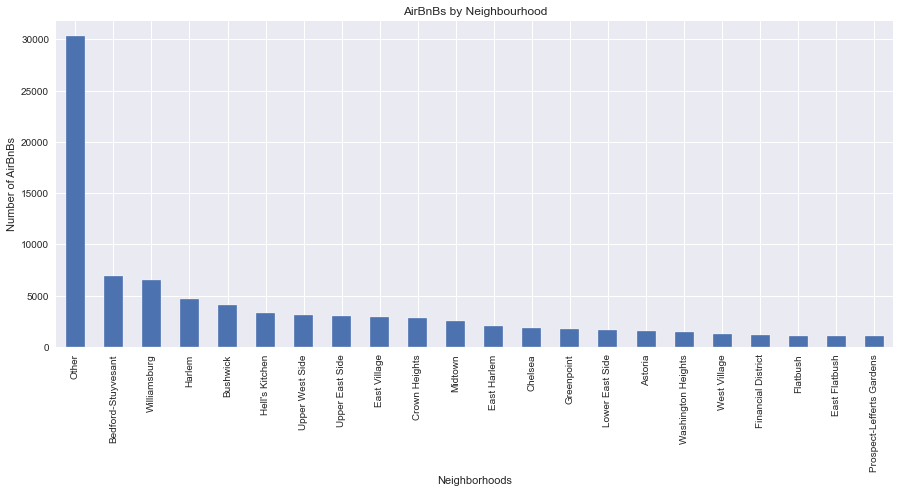

In [62]:
neighborhood_count.plot(kind='bar',figsize=(15,6))
plt.ylabel('Number of AirBnBs')
plt.xlabel('Neighborhoods')
plt.title('AirBnBs by Neighbourhood');

Seems like people frequently stay in Bedford-Stuyvesant and Williamsburg the most.

In [63]:
# Neighborhood Average Price
neighborhood_price = main_df[['price','neighbourhood','minimum nights']].groupby('neighbourhood').mean().sort_values(by='price',ascending=False)
neighborhood_price

,price,minimum nights
neighbourhood,,
Flatbush,649.732291,5.634775
West Village,639.384052,8.522622
East Flatbush,638.896584,7.335646
Prospect-Lefferts Gardens,637.556751,5.952252
Astoria,636.775719,6.466647
Bushwick,629.920770,7.470310
Other,627.626126,7.092746
Harlem,626.583829,7.300790
Lower East Side,624.380895,6.172859


Getting a look at which neighborhoods are most expensive on average.

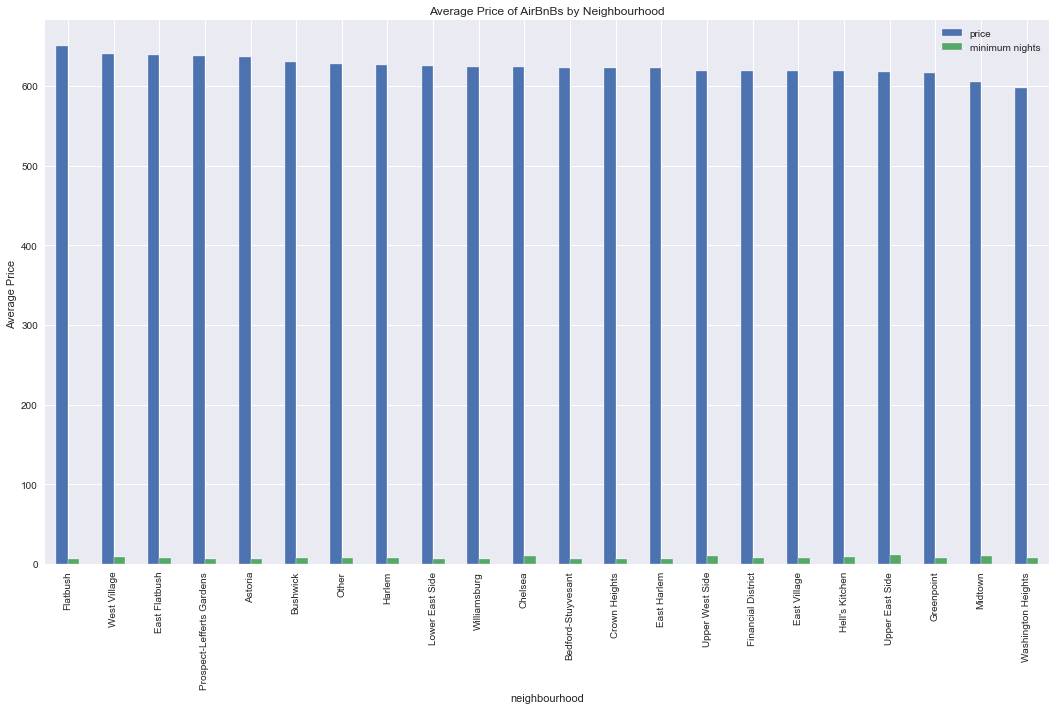

In [64]:
neighborhood_price.plot(kind='bar',figsize=(18,10))
plt.ylabel('Average Price ')
plt.title('Average Price of AirBnBs by Neighbourhood');

People spend the most money in Flatbush, West Village, East Flatbush, Prospect-Lefferts Gardens, and Astoria.

In [77]:
# Neighborhood Average Price sorted by minimum nights
neighborhood_min_nights = main_df[['neighbourhood','minimum nights']].groupby('neighbourhood').mean().sort_values(by='minimum nights',ascending=False).head(10)
neighborhood_min_nights

,minimum nights
neighbourhood,
Upper East Side,11.580703
Upper West Side,9.845602
Midtown,9.650204
Chelsea,9.607268
Hell's Kitchen,9.078994
West Village,8.522622
Financial District,7.967902
Greenpoint,7.782978
Washington Heights,7.688236


Sorting neighborhoods by most nights spent.

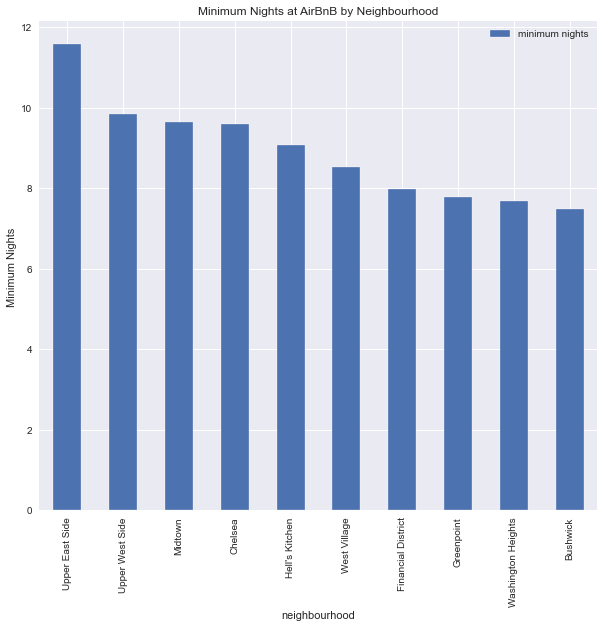

In [79]:
neighborhood_min_nights.plot(kind='bar',figsize=(10,9))
plt.ylabel('Minimum Nights ')
plt.title('Minimum Nights at AirBnB by Neighbourhood');

People stay the longest in Upper East Side, Upper West Side, Midtown, Chelsea, and Hell's Kitchen.

In [67]:
neighborhood_group_price = data[['price','neighbourhood group', 'minimum nights']].groupby('neighbourhood group').mean().sort_values(by='price',ascending=False)
neighborhood_group_price

,price,minimum nights
neighbourhood group,,
Queens,629.047969,6.070873
Bronx,628.259829,5.362738
Brooklyn,626.066669,6.836214
Manhattan,621.333417,8.750596
Staten Island,621.253538,5.062976


All of NY's boroughs seem to have about the same average price.

In [68]:
# Creating a DF with just Neighborhood, Latitude, longitude and Price
#neighborhood_locations = open_data[df_foliumn]
#neighborhood_locations.info()

In [69]:
#Converting price and removings NaNs
#neighborhood_locations.loc[:, ['price']] = neighborhood_locations['price'].fillna('0')

# Replacing NaNs in Price column with the average price of an Airbnb in NY
# First need to convert str to integer
#neighborhood_locations.loc[:, ['price']] = neighborhood_locations['price'].str.replace(',', '')
#neighborhood_locations.loc[:, ['price']] = neighborhood_locations['price'].str.replace('$', '')
#neighborhood_locations.loc[:, ['price']] = neighborhood_locations['price'].astype(int)
#neighborhood_locations['price'].dtype

In [70]:
#Check for NaNs
#neighborhood_locations.isna().sum()

In [71]:
#neighborhood_locations.dropna(subset= ['neighbourhood', 'lat', 'long'], inplace=True)
# Final Check for NaNs
#neighborhood_locations.isna().sum()

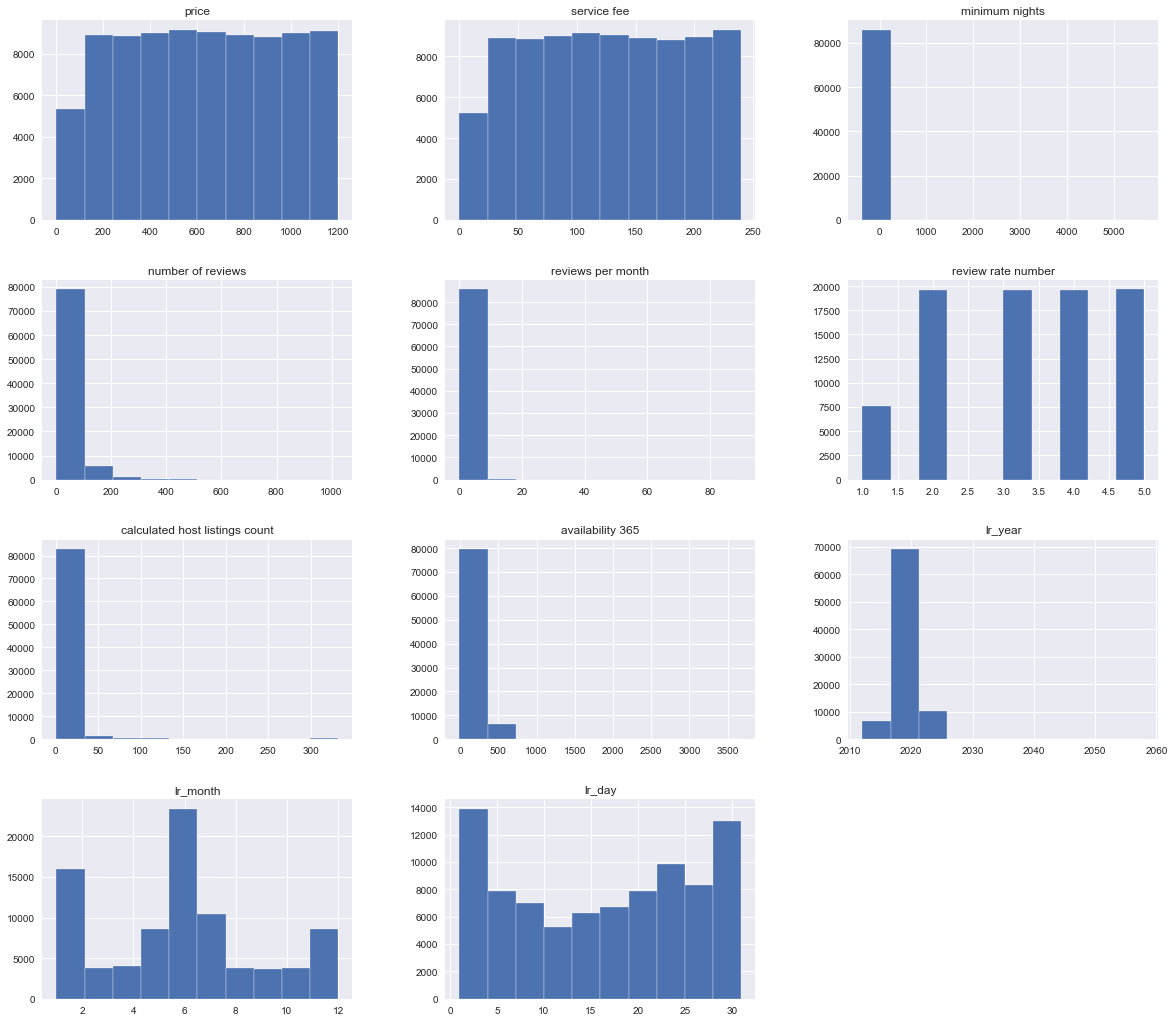

In [72]:
data.hist(figsize = (20,18));

Checking to see if any variable was normally distributed. 

Not much normal distribution going on within these graphs.

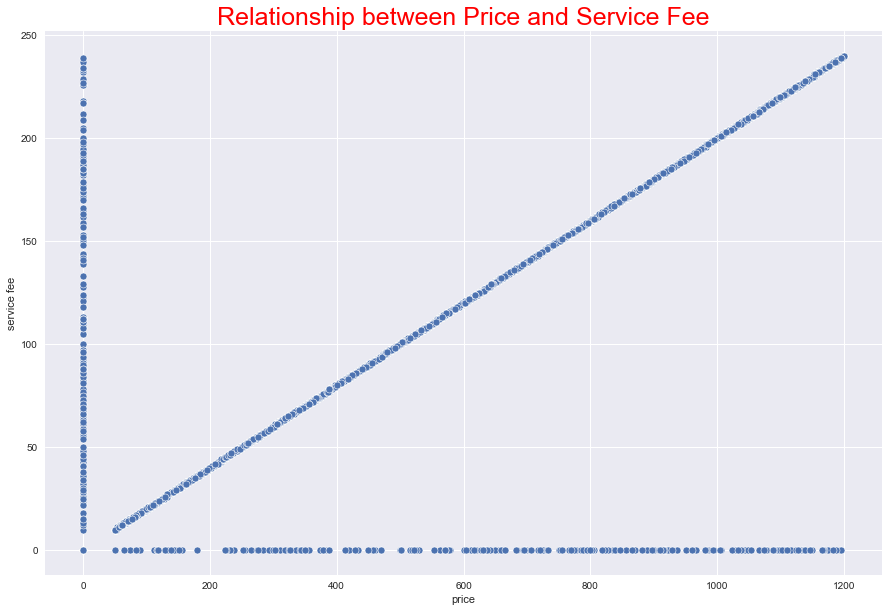

In [73]:
# Relationship between price and service fee
plt.figure(figsize=(15,10))
plt.title("Relationship between Price and Service Fee", size=25, color="red")
sns.scatterplot(x=data.price, y=data['service fee'] );

High room price means the service price will also be high.

In [75]:
min_nights = data['minimum nights'].value_counts().head()
min_nights

2.0     21193
1.0     20963
3.0     14143
30.0     9366
4.0      5667
Name: minimum nights, dtype: int64

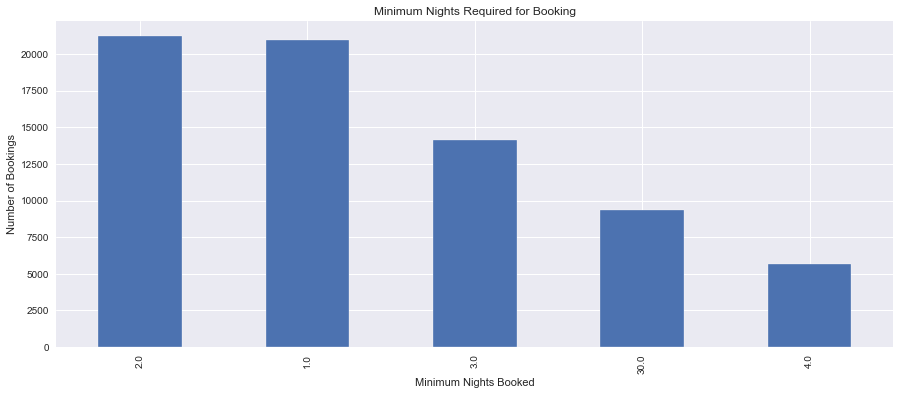

In [76]:
min_nights.plot(kind='bar', figsize=(15,6))
plt.ylabel('Number of Bookings')
plt.xlabel('Minimum Nights Booked')
plt.title('Minimum Nights Required for Booking');

Visualizing minimum nights required for booking. Most popular is 2 nights. Closely followed is 1 night then 3. Weirdly, 4th is 30 nights and last is 4 nights. 
The New York City Airbnb law says it's illegal to rent apartments for fewer than 30 days in most buildings, particularly Class A dwellings. 

In [314]:
data.columns

Index(['host_identity_verified', 'neighbourhood group', 'neighbourhood',
       'price', 'service fee', 'minimum nights', 'number of reviews',
       'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365', 'lr_year',
       'lr_month', 'lr_day'],
      dtype='object')

## Check Correlation 

In [315]:
check_corr = data.drop('price', axis=1)
corr = check_corr.corr()

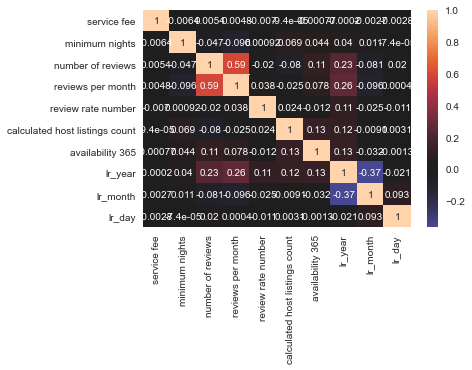

In [316]:
sns.heatmap(corr, center=0, annot=True);

No columns really show any correlations to one another, so there is no need to remove and similar columns. There is some with reviews per month.

## Separating Continuous and Categorical Data & Creating Target Variable

Prepping for the train test split and one hot encoding.

In [317]:
# Removed 'price' from continuous and last review because it was a dtype datetime
# Removed host id and host name b/c it isn't necessary 
continuous = ['service fee', 'minimum nights','number of reviews','reviews per month',
             'review rate number', 'calculated host listings count', 'availability 365',
             'lr_year', 'lr_month','lr_day']
categoricals = ['host_identity_verified','neighbourhood group','neighbourhood']
# Creating categoricals without neighbourhood
categoricals2 = ['host_identity_verified','neighbourhood group']
# Creating Continuous without service fee b/c it is so highly correlated with price
continuous2 = ['minimum nights','number of reviews','reviews per month',
             'review rate number', 'calculated host listings count', 'availability 365',
             'lr_year', 'lr_month','lr_day']
# Creating Continuous with just top features
continuous3 = ['number of reviews','reviews per month',
               'calculated host listings count', 'availability 365',
             'lr_year', 'lr_month','lr_day']


Second continuous variable was created here to see what some models looked like with out service fee. Third continuous was created with just the top features in mind.

In [318]:
data_cont = main_df[continuous]
data_cont2= main_df[continuous2]
data_cont3= main_df[continuous3]
data_cat = main_df[categoricals]
data_cat2 = main_df[categoricals2]

In [319]:
# Create Target variable
target = main_df['price']
main_dataframe = main_df.drop('price', axis=1)
# Creating main_dataframe2 because service fee is so highly correlated
main_dataframe2 = main_df.drop(['price', 'service fee'], axis=1)
main_dataframe3 = main_df.drop(['price', 'service fee','neighbourhood','minimum nights',
                               'review rate number'], axis=1)

## Train & Test Split + One Hot Encoding

In [320]:
data_train, data_test, target_train, target_test = train_test_split(main_dataframe, target, 
                                                                    test_size = 0.25, random_state=123)

Creating second train test split with service fee removed from dataset.

In [321]:
data_train2, data_test2, target_train2, target_test2 = train_test_split(main_dataframe2, target, 
                                                                    test_size = 0.25, random_state=123)

Creating a third train test split with just most important features.

In [322]:
data_train3, data_test3, target_train3, target_test3 = train_test_split(main_dataframe3, target, 
                                                                    test_size = 0.25, random_state=123)

One hot encode categorical data.

In [323]:
ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe_train = ohe.fit_transform(data_train[categoricals])
data_train[categoricals].shape

(64512, 3)

One Hot encode without neighbourhoods feature.

In [324]:
ohe2 = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore")
ohe_train2 = ohe2.fit_transform(data_train3[categoricals2])
data_train3[categoricals2].shape

(64512, 2)

Turning categorical data into numerical.

In [325]:
ohe_train.shape

(64512, 29)

In [326]:
# Create transformed dataframe
ohe_train = pd.DataFrame(
    ohe_train,
    columns=ohe.get_feature_names(), index=data_train.index
    
)
# Replace categorical data with encoded data
data_train.drop(categoricals, axis=1, inplace=True)
data_train = pd.concat([ohe_train, data_train], axis=1)

In [327]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64512 entries, 61735 to 28036
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   x0_unconfirmed                  64512 non-null  float64
 1   x0_verified                     64512 non-null  float64
 2   x1_Bronx                        64512 non-null  float64
 3   x1_Brooklyn                     64512 non-null  float64
 4   x1_Manhattan                    64512 non-null  float64
 5   x1_Queens                       64512 non-null  float64
 6   x1_Staten Island                64512 non-null  float64
 7   x2_Astoria                      64512 non-null  float64
 8   x2_Bedford-Stuyvesant           64512 non-null  float64
 9   x2_Bushwick                     64512 non-null  float64
 10  x2_Chelsea                      64512 non-null  float64
 11  x2_Crown Heights                64512 non-null  float64
 12  x2_East Flatbush            

In [328]:
# Merging second dataset without service fee
# Replace categorical data with encoded data
data_train2.drop(categoricals, axis=1, inplace=True)
data_train2 = pd.concat([ohe_train, data_train2], axis=1)
data_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64512 entries, 61735 to 28036
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   x0_unconfirmed                  64512 non-null  float64
 1   x0_verified                     64512 non-null  float64
 2   x1_Bronx                        64512 non-null  float64
 3   x1_Brooklyn                     64512 non-null  float64
 4   x1_Manhattan                    64512 non-null  float64
 5   x1_Queens                       64512 non-null  float64
 6   x1_Staten Island                64512 non-null  float64
 7   x2_Astoria                      64512 non-null  float64
 8   x2_Bedford-Stuyvesant           64512 non-null  float64
 9   x2_Bushwick                     64512 non-null  float64
 10  x2_Chelsea                      64512 non-null  float64
 11  x2_Crown Heights                64512 non-null  float64
 12  x2_East Flatbush            

In [329]:
# Create transformed dataframe
ohe_train2 = pd.DataFrame(
    ohe_train2,
    columns=ohe2.get_feature_names(), index=data_train3.index
    
)
# Replace categorical data with encoded data
data_train3.drop(categoricals2, axis=1, inplace=True)
# Merging just top features
data_train3 = pd.concat([ohe_train2, data_train3], axis=1)

In [331]:
# Checking final dataset
data_train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64512 entries, 61735 to 28036
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   x0_unconfirmed                  64512 non-null  float64
 1   x0_verified                     64512 non-null  float64
 2   x1_Bronx                        64512 non-null  float64
 3   x1_Brooklyn                     64512 non-null  float64
 4   x1_Manhattan                    64512 non-null  float64
 5   x1_Queens                       64512 non-null  float64
 6   x1_Staten Island                64512 non-null  float64
 7   number of reviews               64512 non-null  int64  
 8   reviews per month               64512 non-null  float64
 9   calculated host listings count  64512 non-null  float64
 10  availability 365                64512 non-null  float64
 11  lr_year                         64512 non-null  int64  
 12  lr_month                    

In [87]:
# Use test 

# Create transformed dataframe
ohe_test = ohe.transform(data_test[categoricals])

ohe_test = pd.DataFrame(
    ohe_test,
    columns=ohe.get_feature_names(), index=data_test.index
    
)
# Replace categorical data with encoded data
data_test.drop(categoricals, axis=1, inplace=True)
data_test = pd.concat([ohe_test, data_test], axis=1)

In [332]:
# Use test 

# Create transformed dataframe
ohe_test2 = ohe2.transform(data_test3[categoricals2])

ohe_test2 = pd.DataFrame(
    ohe_test2,
    columns=ohe2.get_feature_names(), index=data_test3.index
    
)
# Replace categorical data with encoded data
data_test3.drop(categoricals2, axis=1, inplace=True)
data_test3 = pd.concat([ohe_test2, data_test3], axis=1)

In [125]:
# Doing same thing with test data without service fee
# Replace categorical data with encoded data
data_test2.drop(categoricals, axis=1, inplace=True)
data_test2 = pd.concat([ohe_test, data_test2], axis=1)

In [333]:
data_test3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21505 entries, 91561 to 88669
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   x0_unconfirmed                  21505 non-null  float64
 1   x0_verified                     21505 non-null  float64
 2   x1_Bronx                        21505 non-null  float64
 3   x1_Brooklyn                     21505 non-null  float64
 4   x1_Manhattan                    21505 non-null  float64
 5   x1_Queens                       21505 non-null  float64
 6   x1_Staten Island                21505 non-null  float64
 7   number of reviews               21505 non-null  int64  
 8   reviews per month               21505 non-null  float64
 9   calculated host listings count  21505 non-null  float64
 10  availability 365                21505 non-null  float64
 11  lr_year                         21505 non-null  int64  
 12  lr_month                    

## OLS Regression Results

Seeing which variables had any great impact on Airbnb price.

In [88]:
X = data_train
y = target_train

In [89]:
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 8.093e+04
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:02:37   Log-Likelihood:            -3.4255e+05
No. Observations:               64512   AIC:                         6.852e+05
Df Residuals:                   64475   BIC:                         6.855e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            -88.5131    153.530     -0.577      0.564    -389.432     212.405
x0_unconfirmed                   -44.2086     76.765     -0.576      0.565    -194.668     106.250
x0_verified                      -44.3045     76.765     -0.577      0.564    -194.765     106.156
x1_Bronx                         -16.8736     30.756     -0.549      0.583     -77.154      43.407
x1_Brooklyn                      -17.1883     30.689     -0.560      0.575     -77.340      42.963
x1_Manhattan                     -17.6437     30.659     -0.575      0.565     -77.736      42.449
x1_Queens                        -17.0828     30.725     -0.556      0.578     -77.304      43.139
x1_Staten Island                 -19.7248     30.782     -0.641      0.522     -80.058      40.609
x2_Astoria                        -6.2975      7.112     -0.885      0.376     -20.237       7.642
x2_Bedford-Stuyvesant             -4.0470      7.032     -0.576      0.565     -17.830       9.736
x2_Bushwick                       -2.7252      7.032     -0.388      0.698     -16.507      11.057
x2_Chelsea                        -3.4508      7.122     -0.484      0.628     -17.411      10.509
x2_Crown Heights                  -4.8392      7.061     -0.685      0.493     -18.678       9.000
x2_East Flatbush                  -2.0758      7.246     -0.286      0.775     -16.277      12.125
x2_East Harlem                    -3.6134      7.118     -0.508      0.612     -17.564      10.337
x2_East Village                   -5.0527      7.046     -0.717      0.473     -18.862       8.757
x2_Financial District             -2.9938      7.150     -0.419      0.675     -17.009      11.021
x2_Flatbush                       -2.7533      7.187     -0.383      0.702     -16.839      11.332
x2_Greenpoint                     -4.1062      7.098     -0.578      0.563     -18.019       9.806
x2_Harlem                         -2.3843      7.064     -0.338      0.736     -16.230      11.461
x2_Hell's Kitchen                 -4.1698      7.089     -0.588      0.556     -18.064       9.724
x2_Lower East Side                -3.8904      7.133     -0.545      0.586     -17.872      10.091
x2_Midtown                        -4.9726      7.119     -0.699      0.485     -18.925       8.980
x2_Other                          -4.1062      7.000     -0.587      0.557     -17.826       9.613
x2_Prospect-Lefferts Gardens      -5.3995      7.206     -0.749      0.454     -19.523       8.724
x2_Upper East Side                -6.3507      7.075     -0.898      0.369     -20.217       7.515
x2_Upper West Side                -4.6743      7.049     -0.663      0.507     -18.491       9.143
x2_Washington Heights             -2.5956      7.136     -0.364      0.716     -16.582      11.391
x2_West Villag

From these regression results, it looks like variables that effect the price the most are unconfirmed, verified, or choosing a location part of the 5 boroughs. There is an average of about 89 dollars per AirBnb. Some neighborhoods that would be cheaper than others would be  Upper East Side, Astoria, Prospect-Lefferts Gardens, and East Village. It seems as though time of the year to get an AirBnB does not affect the price that much. The location you choose seems to affect it more.

## Building Regressor Tree Models

Multiple models will be created to see which one has the lowest RMSE.

### Baseline Decision Tree

Need to start off with a baseline before using more complex models.

In [90]:
# Instantiating and fitting a DecisionTreeRegressor
# Get predictions for training 
baseline_tree = DecisionTreeRegressor(random_state=123) 
baseline_tree.fit(data_train, target_train)
predictions = baseline_tree.predict(data_test)

In [91]:
# Examining how important each feature ends up being
# Feature importance
baseline_tree.feature_importances_

array([1.49562469e-04, 2.14342685e-04, 1.45394485e-06, 2.67307389e-04,
       1.37657987e-04, 1.34919410e-04, 1.27152516e-05, 1.52206610e-05,
       2.50950456e-04, 1.19473540e-04, 4.20819088e-05, 1.11187182e-05,
       4.13553821e-08, 9.07184853e-05, 1.46107985e-04, 2.11114211e-07,
       6.88450508e-06, 1.37050303e-05, 6.18981071e-06, 8.82118729e-05,
       1.31773800e-05, 1.79347159e-04, 1.04258574e-04, 3.04305914e-06,
       8.37332607e-05, 4.12346335e-05, 2.03533480e-05, 6.32259640e-07,
       1.44733812e-04, 9.88443880e-01, 8.94427513e-04, 1.41545222e-03,
       1.59956555e-03, 7.55372163e-04, 6.29478049e-04, 1.25991650e-03,
       2.56711372e-04, 5.81344304e-04, 1.86446430e-03])

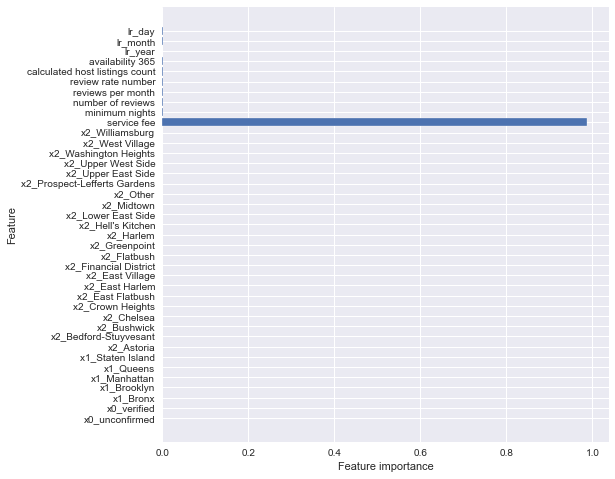

In [92]:
# Visualizing feature importance 
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(baseline_tree)

Service fee seems to be the only important feature.

In [93]:
# Test set predictions
baseline_pred = baseline_tree.predict(data_test)


In [94]:
# Evaluating the Algorithm
# actual vs predicted 
print('Mean Absolute Error:', metrics.mean_absolute_error(target_test, baseline_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(target_test, baseline_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_test, baseline_pred)))

Mean Absolute Error: 5.392583120204604
Mean Squared Error: 3335.096361311323
Root Mean Squared Error: 57.750293170782456


### Random Forest

In [95]:
# Instantiate and fit RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 123)

Passing training data to train the RF regressor model

In [96]:
regressor.fit(data_train, target_train)

RandomForestRegressor(n_estimators=50, random_state=123)

Predicting test set results using RF regressor model

In [97]:
# Predicting the Test set results
target_pred = regressor.predict(data_test)

Evaluate RF regressor model algorithm using error metrics.

In [98]:
# Evaluating the Algorithm
# With n_estimators = 50
# actual vs predicted 
print('Mean Absolute Error:', metrics.mean_absolute_error(target_test, target_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(target_test, target_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_test, target_pred)))

Mean Absolute Error: 5.099519755095713
Mean Squared Error: 1821.9673312665452
Root Mean Squared Error: 42.6845092658513


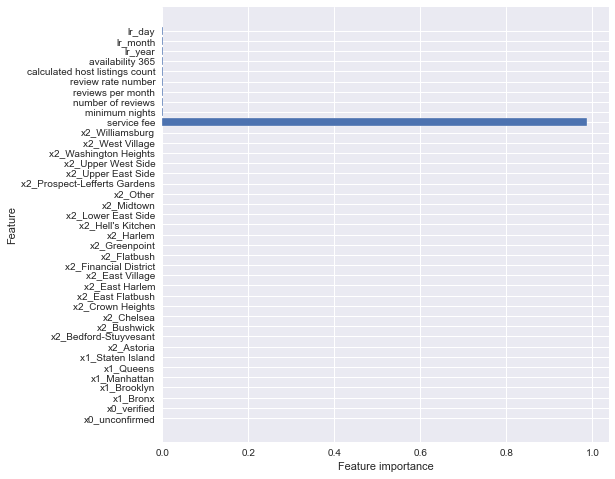

In [99]:
plot_feature_importances(regressor)

Trying n_estimator = 40

In [100]:
regressor2 = RandomForestRegressor(n_estimators = 40, random_state = 123)

In [101]:
regressor2.fit(data_train, target_train)
# Predicting the Test set results
target_pred2 = regressor2.predict(data_test)

In [102]:
# Evaluating the Algorithm
# With n_estimators = 40
# actual vs predicted 
print('Mean Absolute Error:', metrics.mean_absolute_error(target_test, target_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(target_test, target_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_test, target_pred2)))

Mean Absolute Error: 5.129389889948073
Mean Squared Error: 1845.9050140644972
Root Mean Squared Error: 42.96399671893314


Trying n_estimator = 30

In [103]:
regressor3 = RandomForestRegressor(n_estimators = 30, random_state = 123)

In [104]:
regressor3.fit(data_train, target_train)
# Predicting the Test set results
target_pred3 = regressor3.predict(data_test)

In [105]:
# Evaluating the Algorithm
# With n_estimators = 30
# actual vs predicted 
print('Mean Absolute Error:', metrics.mean_absolute_error(target_test, target_pred3))  
print('Mean Squared Error:', metrics.mean_squared_error(target_test, target_pred3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_test, target_pred3)))

Mean Absolute Error: 5.146629513992686
Mean Squared Error: 1864.4637599824623
Root Mean Squared Error: 43.17943677240895


### Random Forest with Grid Search

In [106]:
# Number of trees in random forest
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [10, 12],
    'n_estimators': [200, 300]
}
# Create a based model
rf_grid = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [107]:
# Fit grid search to data
grid_search.fit(data_train, target_train)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 300}
best_grid = grid_search.best_estimator_


Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  3.2min finished


In [108]:
print("The best hyperparameters are ",grid_search.best_params_)

The best hyperparameters are  {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}


Using best hyperparameters for final calculation.

In [109]:
rf_grid = RandomForestRegressor(bootstrap = grid_search.best_params_["bootstrap"],
                           max_depth  = grid_search.best_params_["max_depth"],
                           max_features     = grid_search.best_params_["max_features"],
                           min_samples_leaf     = grid_search.best_params_["min_samples_leaf"],
                           min_samples_split     = grid_search.best_params_["min_samples_split"],
                           n_estimators  = grid_search.best_params_["n_estimators"])
rf_grid.fit(data_train, target_train)

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=200)

In [110]:
rf_pred = rf_grid.predict(data_test)

In [111]:
# Evaluating the Algorithm
# actual vs predicted 
print('Mean Absolute Error:', metrics.mean_absolute_error(target_test, rf_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(target_test, rf_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_test, rf_pred)))

Mean Absolute Error: 75.46257790949845
Mean Squared Error: 10230.180315716561
Root Mean Squared Error: 101.14435384991374


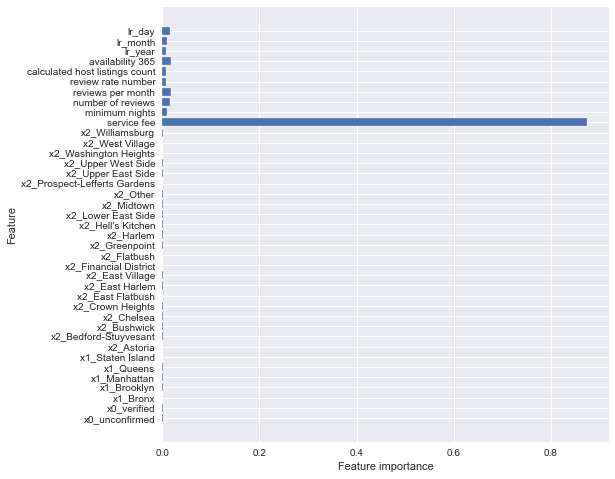

In [112]:
plot_feature_importances(rf_grid)

Similar the other models above, service fee still seems way higher than the rest.

### XG Boost


In [113]:
import xgboost as xgb

In [114]:
# Instantiate XGBClassifier
xg_regressor= xgb.XGBRegressor(eval_metric='rmse')

In [127]:
# Creating second one without service fee
xg_regressor2 = xgb.XGBRegressor(eval_metric='rmse')

In [334]:
# Creating third one with just main feauures
xg_regressor3 = xgb.XGBRegressor(eval_metric='rmse')

In [115]:
# Set up search grid
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [100, 200, 300],
              "learning_rate": [0.01, 0.015]}


In [116]:
# Trying out every combination of the above values
search = GridSearchCV(xg_regressor, param_grid, cv=5).fit(data_train, target_train)
print("The best hyperparameters are ",search.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 300}


Using best hyperparameters for final calculation.

In [117]:
xg_regressor = xgb.XGBRegressor(learning_rate = search.best_params_["learning_rate"],
                           n_estimators  = search.best_params_["n_estimators"],
                           max_depth     = search.best_params_["max_depth"],)

xg_regressor.fit(data_train, target_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.015, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Using model for predictions.

In [118]:
xg_pred = xg_regressor.predict(data_test)

In [119]:
# Evaluating the Algorithm
# actual vs predicted 
print('Mean Absolute Error:', metrics.mean_absolute_error(target_test, xg_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(target_test, xg_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_test, xg_pred)))

Mean Absolute Error: 10.570509811823547
Mean Squared Error: 1577.1709730373932
Root Mean Squared Error: 39.713611936430475


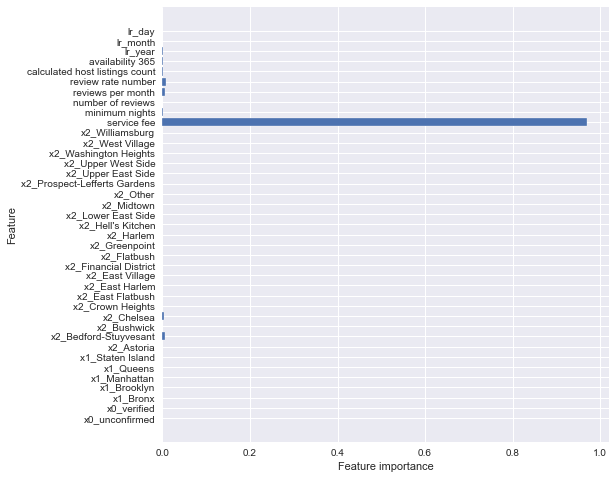

In [120]:
plot_feature_importances(xg_regressor)

Out of all the models used, XGBoost had the lowest RMSE which was 39.71

#### XG Bosst without Service Fee

In [128]:
# Trying out every combination of param grid
search2 = GridSearchCV(xg_regressor2, param_grid, cv=5).fit(data_train2, target_train2)
print("The best hyperparameters are ",search2.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 4, 'n_estimators': 300}


In [129]:
xg_regressor2 = xgb.XGBRegressor(learning_rate = search2.best_params_["learning_rate"],
                           n_estimators  = search2.best_params_["n_estimators"],
                           max_depth     = search2.best_params_["max_depth"],)

xg_regressor2.fit(data_train2, target_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.015, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [130]:
xg_pred2 = xg_regressor2.predict(data_test2)

In [131]:
# Evaluating the Algorithm
# actual vs predicted 
print('Mean Absolute Error:', metrics.mean_absolute_error(target_test2, xg_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(target_test2, xg_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_test2, xg_pred2)))

Mean Absolute Error: 287.55282549207305
Mean Squared Error: 110496.0780582735
Root Mean Squared Error: 332.40950356190706


RMSE increased exponentially from ~39 to ~332. 

In [133]:
# Rewriting plot feature importance function
# Visualizing feature importance 
def plot_feature_importances2(model):
    n_features = data_train2.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train2.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

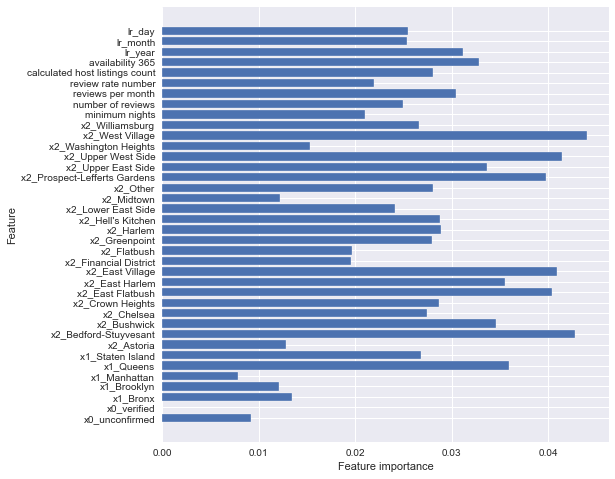

In [134]:
plot_feature_importances2(xg_regressor2)

Featured importance data is all over the place. Top 6 features according to this chart are West Village, Bedford-Stuyvesant, Upper West Side, East Village, East Flatbush, Prospect-Lefferts Gardens. Among the continuous data the top features seem to be availability_365, lr_year, reviews per month, and calculated host listings count

#### XG Boost with just main features

In [335]:
# Trying out every combination of param grid
search3 = GridSearchCV(xg_regressor3, param_grid, cv=5).fit(data_train3, target_train3)
print("The best hyperparameters are ",search3.best_params_)

The best hyperparameters are  {'learning_rate': 0.015, 'max_depth': 5, 'n_estimators': 300}


In [336]:
xg_regressor3 = xgb.XGBRegressor(learning_rate = search3.best_params_["learning_rate"],
                           n_estimators  = search3.best_params_["n_estimators"],
                           max_depth     = search3.best_params_["max_depth"],)

xg_regressor3.fit(data_train3, target_train3)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.015, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [337]:
xg_pred3 = xg_regressor3.predict(data_test3)

In [338]:
# Evaluating the Algorithm
# actual vs predicted 
print('Mean Absolute Error:', metrics.mean_absolute_error(target_test3, xg_pred3))  
print('Mean Squared Error:', metrics.mean_squared_error(target_test3, xg_pred3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(target_test3, xg_pred3)))

Mean Absolute Error: 287.68327523475193
Mean Squared Error: 110623.00374710109
Root Mean Squared Error: 332.6003664265887


In [342]:
# Rewriting plot feature importance function
# Visualizing feature importance 
def plot_feature_importances3(model):
    n_features = data_train3.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train3.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

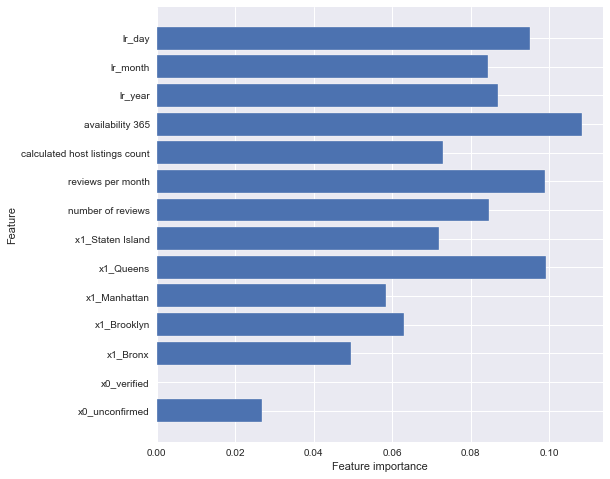

In [343]:
plot_feature_importances3(xg_regressor3)

From this reduced feature importance graph, it shows that an Airbnb being available for 365 days a year is most important to the price. Bookings in Queens seem to also impact the price the most out of all the boroughs. It also seems that booking on a certain day impacts price more slightly than booking on a certain month or year. Reviews per month of a Airbnb equally impacts the price as well. Finally, being an unconfirmed host seems to have more of an impact on the price than a verified host.

# Conclusion

After analyzing this dataset from Airbnb, I got a clearer picture of what customers prefer and what effects the total price. To start off with, here is some general information. The most stayed at neighborhood seemed to be Bedford-Stuyvesant (Bed-Stuy) in Brooklyn. Secondly, some of the most expensive neighborhoods people stay at on average are Flatbush, West Willage, East Flatbush, Prospect-Lefferts Gardens, and Astoria. People tend to stay their longest visits in Upper East Side (11.5) days, Upper West Side, Midtown, Chelsea, and Hell's Kitchen. Building off that, the data suggests that people spend the longest stays in Manhattan on average compared to the rest of New York's boroughs. Speaking of booking, the amount of nights people tend to stay at a location is 1-2 nights.
Diving further into the data, a OLS Regression chart was created. From this, it was seen that the average price for an Airbnb amongst customers was $89. The neighborhoods that someone could stay at for a cheaper price are Upper East Side, Astoria, Prospect-Lefferts Gardens, and East Village. Finally, it seems that the service fee for these stays predictably affect the total price the most for an Airbnb.
Finally the data was applied to several regressor tree models. Those being a baseline one, random forest with different number of estimators, random forest with a grid search applied, and a XG Boost model with Grid Search. Among these variations, the model with the lowest RMSE was XG Boost with a value of 39.71.
From all this data collected, one can say people tend to use Airbnbs to stay in Manhattan and their visits are longer than anywhere else. If one wanted to stay at the most affordable areas, they would want to stay in either Upper East Side, Astoria, Prospect-Lefferts Gardens, and East Village. Finally, the host of these Airbnbs should expect the average person to stay 1-2 nights.